<div>
<FONT FACE="times new roman" SIZE=5>
<i><b>Juan Carlos Tarazona Contreras.
<br><br>
<i><b> Proyecto Talento_Tech: Reinforcement Learning en la simulación de un combate Pokémon
<br>
<br>
08/2024
<br>
</FONT>
</div>

## Tabla de Contenido
- [1. Planteamiento del Problema](#1.-Planteamiento-del-Problema)
- [2. Clases](#2.-Clases)
- [3. Funciones](#3.-Funciones)
- [4. Variables](#4.-Variables)
- [5. Importación de librerías](#5.-Importación-de-librerías)
- [6. Definición de la clase Pokémon](#6.-Definición-de-la-clase-Pokémon)
- [7. Definición de la clase Q-Learning Agent](#4.-Definición-de-la-clase-Q-Learning-Agent)
- [8. Entrenamiento de simulaciones de batallas y métricas de las tasas de desempeño](#4.-Entrenamiento-de-simulaciones-de-batallas-y-métricas-de-las-tasas-de-desempeño)
- [9. Carga de imágenes](#9.-Carga-de-imágenes)
- [10. Evaluación con muestra de imágenes](#4.-Evaluación-con-muestra-de-imágenes)
- [11. Confirmación de Reinforcement Learning](#11.-Confirmación-de-Reinforcement-Learning)
- [12. Conclusiones](#4.-Conclusiones)

# 1. Planteamiento del Problema


Se observó que muchos de los videojuegos de combate RPG presentan una variabilidad en sus formas de como desafian al jugador para que este tenga una experiencia desafiante, inmersiva y dinámica.

A través de esto, se busca mirar como funcionan los combates en estos juegos y ver cuales son las formas más óptimas para conseguir una victoria.

En este caso se tomo como ejemplo un combate del videojuego Pokémon, presentando dos de ellos, los cuales tienen su respectiva vida y sus respectivos ataques. Con toda esta información el objetivo del programa será hallar todas las formas, o la mejor forma de explotar la lógica del funcionamiento del combate para que uno de estos salga victorioso el mayor número de veces.

# 2. Clases

__Pokemon__ = Se define como es el objeto, sus características y como es su acción de atacar.

__Q-Learning Agent__ = Es la clase donde se aplica el reinforcement learning para hallar la forma más óptima de ganar respecto al Pokémon Gengar

# 3. Funciones

__init__ = Constructor del objeto Pokémon con sus características, aplicación del alpha, gamma, epsilon y las acciones del reinforcement learning.

__attack__ = Es la acción de ataque y genera el descuento de vida.

__get_q__ = Busca el estado con la acción para realizarla, representa el mejor Q.

__choose_action__ = Escoge un ataque aleatorio a realizar para así ver cual es el de mejor desempeño.

__learn__ = Se aprende cual es el mejor Q por medio de las recompensas para así siempre usarlo.

__battle__ = Simula como es una batalla

__evaluate_agent__ = Repite las acciones del entrenamiento, pero esta vez, mostrando por imágenes las acciones de combate de cada Pokémon y también el ganador de cada batalla.

# 4. Variables

__name__ = Nombre del Pokémon

__vida__ = Vida del Pokémon

__attacks__ = Contiene los 4 diferentes ataques posibles

__damage__ = Recibe el valor del ataque realizado

__actions__ = Lista de los ataques disponibles

__alpha__ = Tasa de aprendizaje

__gamma__ = Factor de descuento

__epsilon__ = Tasa de exploración

__qs__ = Lista de valores_Q para las posibles acciones respecto al estado actual.

__old_q__ = Toma el estado actual

__next_q__ = Toma el Q máximo y lo asigna al Q actual.

__state__ == Estado actual de la vida

__win_rate__ = Tasa de victoria

__loss_rate__ = Tasa de derrota


# 5. Importación de librerías

In [1]:
# Importación de las librerías necesarias para el análisis
import numpy as np
import random
import matplotlib.pyplot as plt
import requests
import matplotlib.image as mpimg
from io import BytesIO
from PIL import Image

# 6. Definición de la clase Pokémon

In [2]:
# Definición de la clase Pokémon
class Pokemon:
    # Función constructora del pokémon
    def __init__(self, name, life, tackle, gift, peck, earthquake):
        self.name = name
        self.life = life
        self.attacks = {
            "tackle": tackle,
            "gift": gift,
            "peck": peck,
            "earthquake": earthquake
        }
    # Función que define el ataque de un Pokémon
    def attack(self, attack_name, target):
        damage = self.attacks[attack_name]
        target.life -= damage
        print(f"{self.name}: Attack with {attack_name}! {target.life} life remains to {target.name}.")
        return damage

# 7. Definición de la clase Q-Learning Agent

In [3]:
# Definición de la clase Q-Learning Agent
class QLearningAgent:
    def __init__(self, actions, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.q_table = {}
        self.alpha = alpha  # Tasa de aprendizaje
        self.gamma = gamma  # Factor de descuento
        self.epsilon = epsilon  # Tasa de exploración
        self.actions = actions  # Lista de posibles acciones (ataques)

    # Toma del Q
    def get_q(self, state, action):
        return self.q_table.get((state, action), 0.0)

    # Selección de la mejor acción a realizar
    def choose_action(self, state):
        if np.random.random() < self.epsilon:
            return np.random.choice(self.actions)
        else:
            qs = [self.get_q(state, action) for action in self.actions]
            return self.actions[np.argmax(qs)]

    # Aprendizaje
    def learn(self, state, action, reward, next_state):
        old_q = self.get_q(state, action)
        next_q = max([self.get_q(next_state, a) for a in self.actions])
        self.q_table[(state, action)] = old_q + self.alpha * (reward + self.gamma * next_q - old_q)

# 8. Entrenamiento de simulaciones de batallas y métricas de las tasas de desempeño

Se han truncado las últimas 5000 líneas del flujo de salida.
Gengar: Attack with earthquake! 40 life remains to venusaur.
venusaur: Attack with peck! 75 life remains to Gengar.
Gengar: Attack with earthquake! -20 life remains to venusaur.
Gengar wins!
The battle starts! Episode 83
Gengar: Attack with earthquake! 40 life remains to venusaur.
venusaur: Attack with earthquake! 40 life remains to Gengar.
Gengar: Attack with earthquake! -20 life remains to venusaur.
Gengar wins!
The battle starts! Episode 84
Gengar: Attack with earthquake! 40 life remains to venusaur.
venusaur: Attack with earthquake! 40 life remains to Gengar.
Gengar: Attack with earthquake! -20 life remains to venusaur.
Gengar wins!
The battle starts! Episode 85
Gengar: Attack with earthquake! 40 life remains to venusaur.
venusaur: Attack with gift! 98 life remains to Gengar.
Gengar: Attack with earthquake! -20 life remains to venusaur.
Gengar wins!
The battle starts! Episode 86
Gengar: Attack with earthquake! 40 life rem

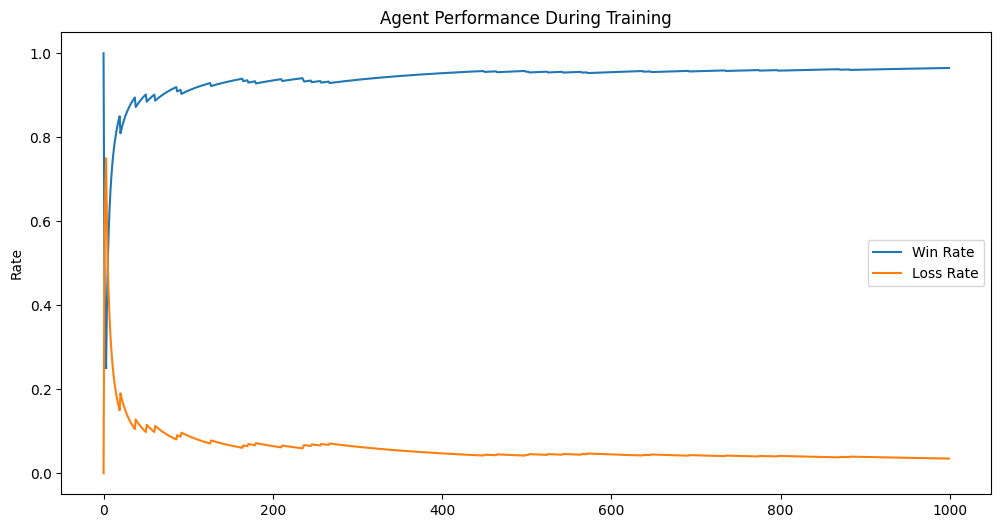

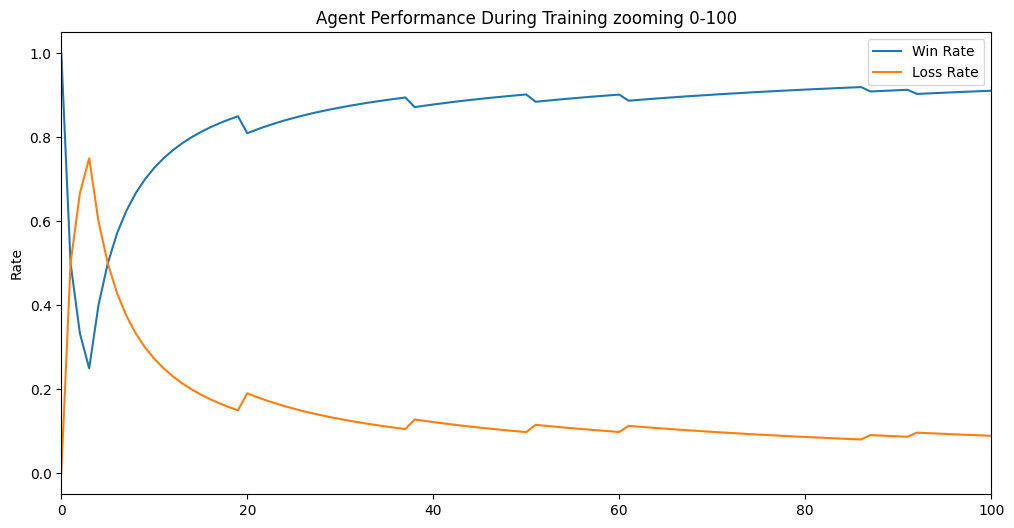

In [4]:
# Función de simulación de batalla (entrenamiento)
def battle(agent, episodes=1000):
    total_wins = 0
    total_losses = 0
    win_rates = []
    loss_rates = []

    for episode in range(episodes):
        # Imprimir el número de episodio actual
        print(f"The battle starts! Episode {episode + 1}")

        # Crear instancias de Pokémon
        gengar = Pokemon("Gengar", life=100, tackle=20, gift=2, peck=25, earthquake=60)
        venusaur = Pokemon("venusaur", life=100, tackle=20, gift=2, peck=25, earthquake=60)

        # Estado inicial
        state = (gengar.life, venusaur.life)
        done = False

        while not done:
            # Gengar ataca
            action = agent.choose_action(state)
            damage = gengar.attack(action, venusaur)
            reward = damage
            next_state = (gengar.life, venusaur.life)

            # Verificar si Gengar ganó
            if venusaur.life <= 0:
                reward += 100  # Recompensa
                total_wins += 1
                print(f"{gengar.name} wins!")
                done = True

            # Verificar de un ataque hecho por Venusaur
            else:
                # Venusaur ataca
                opponent_action = random.choice(list(venusaur.attacks.keys()))
                damage = venusaur.attack(opponent_action, gengar)
                reward -= damage  # Penalización por recibir daño

                # Verificar si Venusaur ganó
                if gengar.life <= 0:
                    reward -= 100  # Penalización por perder
                    total_losses += 1
                    print(f"{venusaur.name} wins!")
                    done = True

            # Aprendizaje
            agent.learn(state, action, reward, next_state)
            state = next_state

        # Calcular las tasas de victoria y derrota
        win_rate = total_wins / (episode + 1)
        loss_rate = total_losses / (episode + 1)
        win_rates.append(win_rate)
        loss_rates.append(loss_rate)

    # Imprimir estadísticas finales
    print("""



    """)
    print("\n--- Agent Performance ---")
    print(f"Training over {episodes} episodes:")
    print(f"Wins: {total_wins}")
    print(f"Losses: {total_losses}")
    print(f"Win Rate: {total_wins / episodes:.2f}")
    print(f"Loss Rate: {total_losses / episodes:.2f}")

    # Graficar las tasas de desempeño
    plt.figure(figsize=(12, 6))
    plt.plot(win_rates, label="Win Rate")
    plt.plot(loss_rates, label="Loss Rate")
    plt.ylabel("Rate")
    plt.title("Agent Performance During Training")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(win_rates, label="Win Rate")
    plt.plot(loss_rates, label="Loss Rate")
    plt.ylabel("Rate")
    plt.title("Agent Performance During Training zooming 0-100")
    plt.legend()

    plt.xlim(0, 100)  # Zoom donde se limita el eje X a valores
                      # entre 0 y 100

plt.show()
# Definimos los ataques y entrenamos al agente
actions = ["tackle", "gift", "peck", "earthquake"]
agent = QLearningAgent(actions)

# Entrenamiento
battle(agent, episodes=1000)

# 9. Carga de imágenes

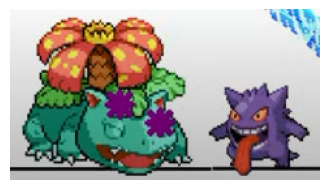

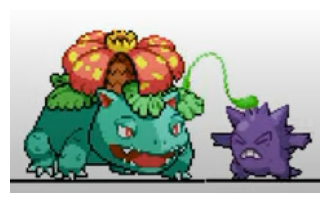

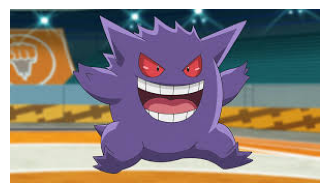

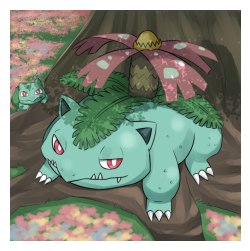

In [5]:
# URL de las imágenes en tu repositorio de GitHub
url1 = 'https://raw.githubusercontent.com/juancarlostarazona01/Talento_Tech/main/proyecto%20-%20talento%20tech/gengar.PNG'
url2 = 'https://raw.githubusercontent.com/juancarlostarazona01/Talento_Tech/main/proyecto%20-%20talento%20tech/venusaur.PNG'
url3 = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR9GsBy3AgsXrgCURaQeRMVBxF48u411qUBEw&s'
url4 = 'https://breedersguide.home.blog/wp-content/uploads/2019/06/venusaur.jpg'

# Descargar las imágenes
response1 = requests.get(url1)
img1 = Image.open(BytesIO(response1.content))
response2 = requests.get(url2)
img2 = Image.open(BytesIO(response2.content))
response3 = requests.get(url3)
img3 = Image.open(BytesIO(response3.content))
response4 = requests.get(url4)
img4 = Image.open(BytesIO(response4.content))

# Convertir las imágenes a arreglos NumPy
img1 = np.array(img1)
img2 = np.array(img2)
img3 = np.array(img3)
img4 = np.array(img4)

# Mostrar las imágenes en una sola línea de código
plt.imshow(img1); plt.axis('off'); plt.gcf().set_size_inches(4, 4); plt.show()
plt.imshow(img2); plt.axis('off'); plt.gcf().set_size_inches(4, 4); plt.show()
plt.imshow(img3); plt.axis('off'); plt.gcf().set_size_inches(4, 4); plt.show()
plt.imshow(img4); plt.axis('off'); plt.gcf().set_size_inches(3, 3); plt.show()

# 10. Evaluación con muestra de imágenes

In [6]:
# Función de evaluación
def evaluate_agent(agent, episodes=1):
    total_wins = 0
    total_losses = 0
    win_rates = []
    loss_rates = []

    for episode in range(episodes):
        print(f"\nThe battle starts! Battle {episode + 1}")
        gengar = Pokemon("Gengar", life=100, tackle=20, gift=2, peck=25, earthquake=60)
        venusaur = Pokemon("venusaur", life=100, tackle=20, gift=2, peck=25, earthquake=60)

        state = (gengar.life, venusaur.life)
        done = False

        while not done:
            # Gengar ataca
            action = agent.choose_action(state)
            damage = gengar.attack(action, venusaur)
            plt.imshow(img1); plt.axis('off'); plt.gcf().set_size_inches(4, 4); plt.show()
            state = (gengar.life, venusaur.life)

            if venusaur.life <= 0:
                total_wins += 1
                print(f"{gengar.name} wins!")
                plt.imshow(img3); plt.axis('off'); plt.gcf().set_size_inches(4, 4); plt.show()
                done = True
            else:
                # venusaur ataca
                opponent_action = random.choice(list(venusaur.attacks.keys()))
                venusaur.attack(opponent_action, gengar)
                plt.imshow(img2); plt.axis('off'); plt.gcf().set_size_inches(4, 4); plt.show()

                if gengar.life <= 0:
                    total_losses += 1
                    print(f"{venusaur.name} wins!")
                    plt.imshow(img4); plt.axis('off'); plt.gcf().set_size_inches(3, 3); plt.show()
                    done = True

        # Calcular las tasas de victoria y derrota
        win_rate = total_wins / (episode + 1)
        loss_rate = total_losses / (episode + 1)
        win_rates.append(win_rate)
        loss_rates.append(loss_rate)

    # Imprimir estadísticas finales
    print("""



    """)
    print("\n--- Agent Performance ---")
    print(f"Evaluation over {episodes} episodes:")
    print(f"Wins: {total_wins}")
    print(f"Losses: {total_losses}")
    print(f"Win Rate: {total_wins / episodes:.2f}")
    print(f"Loss Rate: {total_losses / episodes:.2f}")

    # Graficar las tasas de desempeño
    plt.figure(figsize=(12, 6))
    plt.plot(win_rates, label="Win Rate")
    plt.plot(loss_rates, label="Loss Rate")
    plt.ylabel("Rate")
    plt.title("Agent Performance Over Time")
    plt.legend()
    plt.show()

evaluate_agent(agent, episodes=100)

Output hidden; open in https://colab.research.google.com to view.

# 11. Confirmación del Reinforcement Learning

Gengar: Attack with earthquake! 40 life remains to venusaur.
venusaur: Attack with earthquake! 40 life remains to Gengar.
Gengar: Attack with earthquake! -20 life remains to venusaur.
Gengar: Attack with earthquake! 40 life remains to venusaur.
venusaur: Attack with tackle! 80 life remains to Gengar.
Gengar: Attack with earthquake! -20 life remains to venusaur.
Gengar: Attack with earthquake! 40 life remains to venusaur.
venusaur: Attack with gift! 98 life remains to Gengar.
Gengar: Attack with earthquake! -20 life remains to venusaur.
Gengar: Attack with earthquake! 40 life remains to venusaur.
venusaur: Attack with tackle! 80 life remains to Gengar.
Gengar: Attack with earthquake! -20 life remains to venusaur.
Gengar: Attack with earthquake! 40 life remains to venusaur.
venusaur: Attack with tackle! 80 life remains to Gengar.
Gengar: Attack with earthquake! -20 life remains to venusaur.
Gengar: Attack with earthquake! 40 life remains to venusaur.
venusaur: Attack with earthquake! 40 

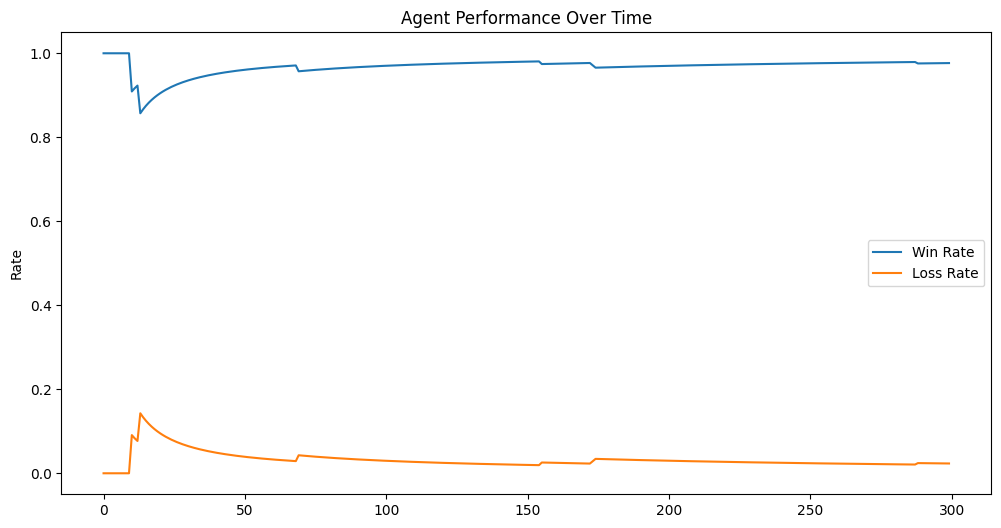

In [7]:
# Función de evaluación
def evaluate_agent(agent, episodes=100):
    total_wins = 0
    total_losses = 0
    win_rates = []
    loss_rates = []

    for episode in range(episodes):
        gengar = Pokemon("Gengar", life=100, tackle=20, gift=2, peck=25, earthquake=60)
        venusaur = Pokemon("venusaur", life=100, tackle=20, gift=2, peck=25, earthquake=60)

        state = (gengar.life, venusaur.life)
        done = False

        while not done:
            # Gengar ataca
            action = agent.choose_action(state)
            damage = gengar.attack(action, venusaur)
            state = (gengar.life, venusaur.life)

            if venusaur.life <= 0:
                total_wins += 1
                done = True
            else:
                # venusaur ataca
                opponent_action = random.choice(list(venusaur.attacks.keys()))
                venusaur.attack(opponent_action, gengar)

                if gengar.life <= 0:
                    total_losses += 1
                    done = True

        # Calcular las tasas de victoria y derrota
        win_rate = total_wins / (episode + 1)
        loss_rate = total_losses / (episode + 1)
        win_rates.append(win_rate)
        loss_rates.append(loss_rate)

    # Imprimir estadísticas finales
    print("""



    """)
    print("\n--- Agent Performance ---")
    print(f"Evaluation over {episodes} episodes:")
    print(f"Wins: {total_wins}")
    print(f"Losses: {total_losses}")
    print(f"Win Rate: {total_wins / episodes:.2f}")
    print(f"Loss Rate: {total_losses / episodes:.2f}")

    # Graficar las tasas de desempeño
    plt.figure(figsize=(12, 6))
    plt.plot(win_rates, label="Win Rate")
    plt.plot(loss_rates, label="Loss Rate")
    plt.ylabel("Rate")
    plt.title("Agent Performance Over Time")
    plt.legend()
    plt.show()

evaluate_agent(agent, episodes=300)

#12. Conclusiones

- Al mirar las métricas del rendimiento del entrenamiento se observa que, el método de aprendizaje solo necesitó aproximadamente unas 10 ejecuciones para aprender cuál es el mejor ataque a realizar para ganar la mayoría de combates, pues al ser un cálculo simple donde solo se tiene que verificar cuál es el daño mayor, el modelo tomará rapidamente este mejor Q.
- Al verificarlo con la evaluación y el muestreo de imágenes, se observó que el programa ya tenía totalmente aprendido el aprendizaje por refuerzo, ya que desde las primeras ejecuciones se ve como comienza con resultados positivos y apenas tiene unos pocos errores.
- Para que el programa tuviera más complejidad y un mejor aprendizaje, se necesitaría una mayor variedad de objetos Pokémon con también una mayor variedad de ataques.
- Se verifica que los hiperparámetros utilizados para el algoritmo son óptimos debido a sus resultados.
- Al analizar el resultado del programa se puede concluir que, muchos videojuegos RPG utilizan esta técnica, ya que no requiere mucho tiempo de análisis y permite una respuesta más lógica para, por ejemplo, aplicar dificultad en la experiencia de la jugabilidad, o, crear una experiencia más inmersiva dentro del videojuego.
